442


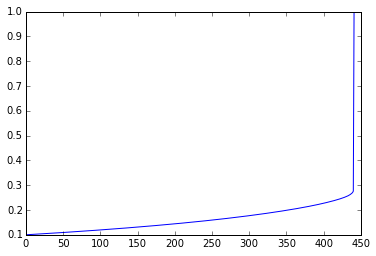

[ 0.0003384   0.00281974  0.00553013 ...,  0.01346714  0.01346714
  0.01347345]
        Book-Rating                                                         \
ISBN     0006493580 000649840X 0006512135 0006513204 0006514855 0006547834   
User-ID                                                                      
243              -1         -1         -1         -1         -1         -1   
254              -1         -1         -1         -1         -1         -1   
507              -1         -1         -1         -1         -1         -1   
638              -1         -1         -1         -1         -1         -1   
805              -1         -1         -1         -1         -1         -1   

                                                       ...                 \
ISBN    0006550576 0006550681 0006550789 0007110928    ...     8495618605   
User-ID                                                ...                  
243             -1         -1         -1         -1    ...      

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

brev_df_raw = pd.read_csv(r'data\book_reviews.csv',low_memory=False)
brev_df = pd.pivot_table(brev_df_raw, values=['Book-Rating'], index=['User-ID'], columns=['ISBN'])
# Update NaN values to be -1.
brev_df = brev_df.fillna(value=-1)

#reduced = brev_df.iloc[:,0:5]
# Decompose our feature matrix into 3 component matrices
U,S,V = np.linalg.svd(brev_df, full_matrices=True)
percent = np.cumsum(np.sort((S*S)/np.sum(S*S)))
# percent2 = np.sort((S*S)/np.sum(S*S))
indexer = 0
for x in xrange(len(percent)):
    if percent[x] >= .1:
        indexer = x #2058
        break
# number of values to keep : 442
print len(percent)-indexer  
plt.plot(percent[2058:])
plt.show()
# print U.shape
# print S.shape
# print V.shape

Vsort = np.sort(V,axis=1)
print Vsort[0,:]
print brev_df.head()

In [36]:
meta = pd.read_csv('data/book_meta.csv', delimiter = ';', error_bad_lines = False, low_memory=False)
# meta.quer1y()
meta.loc[meta['ISBN'] == '000649840X']   #0195153448

Skipping line 227933: expected 10 fields, saw 11



,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,two,three
1261,000649840X,Angelas Ashes,Frank Mccourt,0,Harpercollins Uk,http://images.amazon.com/images/P/000649840X.0...,http://images.amazon.com/images/P/000649840X.0...,http://images.amazon.com/images/P/000649840X.0...,NaN,NaN


C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


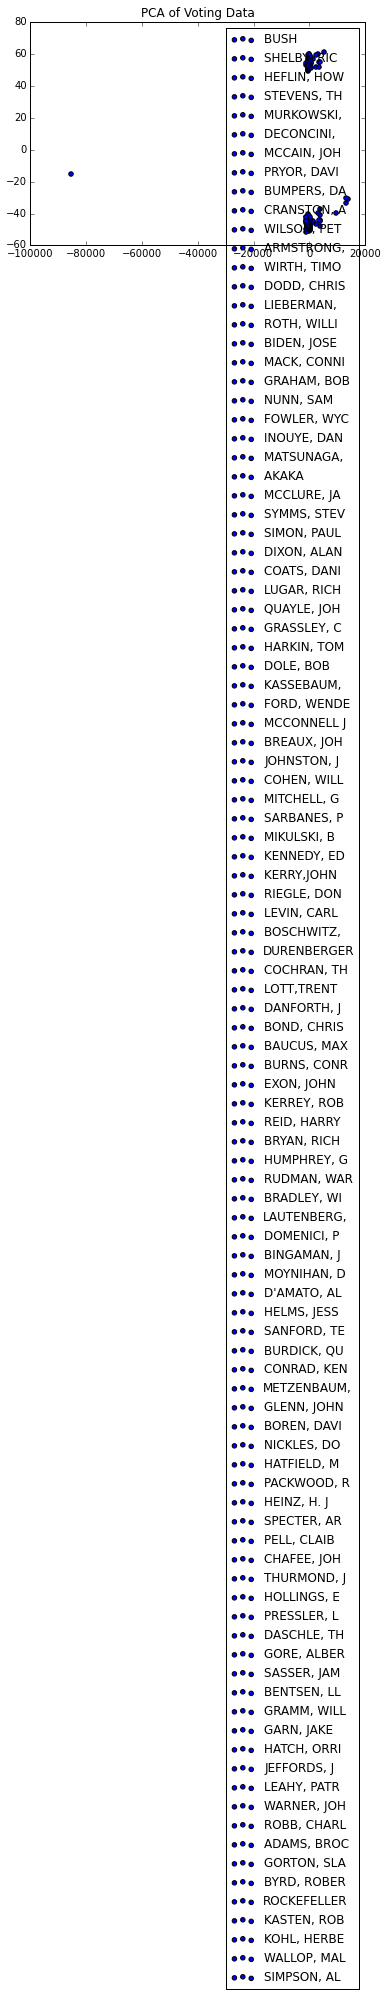

In [13]:
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

files = ['data/senate/'+ f for f in listdir('data/senate') \
             if isfile(join('data/senate',f)) ]
senate = pd.DataFrame()
for datafile in files:
        senate = senate.append(pd.read_csv(datafile))
senate = senate.fillna(value=0).replace(\
    [1,2,3,4,5,6],[1,1,1,1,1,1]).replace([7,8,9,0],[0,0,0,0])
senate1 = senate.loc[senate['cong'] == 101]
names = senate1['name']
y = senate1['party'].replace('200',1).replace(100,0)
senate1.drop(['lstate','name','statenm'],1,inplace=True)
# g = senate.columns.to_series().groupby(senate.dtypes).groups
# g
# print senate.shape
senatepca = PCA(n_components=2)
Xr = senatepca.fit(senate1).transform(senate1)
plt.figure()
for i,target_name in zip(xrange(len(y)), names):
    plt.scatter(Xr[i, 0], Xr[i, 1], label=target_name)
plt.legend()
plt.title('PCA of Voting Data')
plt.show()